## Project 1

### Links

GitHub repo link: 
https://github.com/sarahorte/ind320project.git

Streamlit app link: 
https://ind320project.streamlit.app/

### AI usage
Asking ChatGPT to create a minimum working example of a Streamlit app. Using the suggenstion as a basis, but making minor changes. 

Asking ChatGPT to offer code that: Read the supplied CSV file using Pandas, Print its contents in a relevant way, Plot each column separately, Plot all columns together. Using the anser the base. Asking for furhter assistance to make the plots nicer.

Getting help from chatGPT to plot all the colums togheter. 

### Read the supplied CSV file using Pandas.

In [1]:
import pandas as pd

# Read the CSV file
csv_path = "/Users/sarahorte/Documents/GitHub/ind320project/open-meteo-subset.csv"
df = pd.read_csv(csv_path)

# Display the first few rows to check
df.head()

,time,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
0,2020-01-01T00:00,-2.2,0.1,9.6,21.3,284
1,2020-01-01T01:00,-2.2,0.0,10.6,23.0,282
2,2020-01-01T02:00,-2.3,0.0,11.0,23.5,284
3,2020-01-01T03:00,-2.3,0.0,10.6,23.3,284
4,2020-01-01T04:00,-2.7,0.0,10.6,22.8,284


### Print its contents in a relevant way

In [2]:
# Print the whole dataframe
pd.set_option('display.max_rows', 50)  # show max 50 rows
pd.set_option('display.max_columns', None)  # show all columns
df

,time,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
0,2020-01-01T00:00,-2.2,0.1,9.6,21.3,284
1,2020-01-01T01:00,-2.2,0.0,10.6,23.0,282
2,2020-01-01T02:00,-2.3,0.0,11.0,23.5,284
3,2020-01-01T03:00,-2.3,0.0,10.6,23.3,284
4,2020-01-01T04:00,-2.7,0.0,10.6,22.8,284
...,...,...,...,...,...,...
8755,2020-12-30T19:00,-6.5,0.0,1.6,4.0,58
8756,2020-12-30T20:00,-7.0,0.0,1.2,3.4,50
8757,2020-12-30T21:00,-7.5,0.0,1.1,2.4,22
8758,2020-12-30T22:00,-7.2,0.0,0.6,1.6,22


### Plot each column separately

In [3]:
#I want to plot the values at 12 o'clock for each day in January. For the percipitation, I want to plot the total for each day in January.
# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Filter for the first month (January)
df_jan = df[df['time'].dt.month == 1]

# Keep only rows where the time is 12:00 (noon)
df_jan_noon = df_jan[df_jan['time'].dt.hour == 12]

# For the percipitation, we want the total per day:
df['date'] = df['time'].dt.date  # adds a column with just YYYY-MM-DD

# Filter for January
df_jan = df[df['time'].dt.month == 1]

# Sum precipitation per day
df_jan_precip = df_jan.groupby('date')['precipitation (mm)'].sum().reset_index()

# Columns to plot (skip 'time' and 'precipitation (mm)' and 'date')
data_columns = [col for col in df_jan.columns if col not in ['time', 'precipitation (mm)', 'date']]

# Show the filtered dataframe
df_jan_noon.head()

,time,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
12,2020-01-01 12:00:00,-2.4,0.0,9.2,19.5,282
36,2020-01-02 12:00:00,-1.8,0.0,7.2,16.0,222
60,2020-01-03 12:00:00,-7.0,0.7,8.3,19.5,264
84,2020-01-04 12:00:00,-8.0,0.0,8.5,18.3,318
108,2020-01-05 12:00:00,-2.1,1.2,7.1,15.5,260


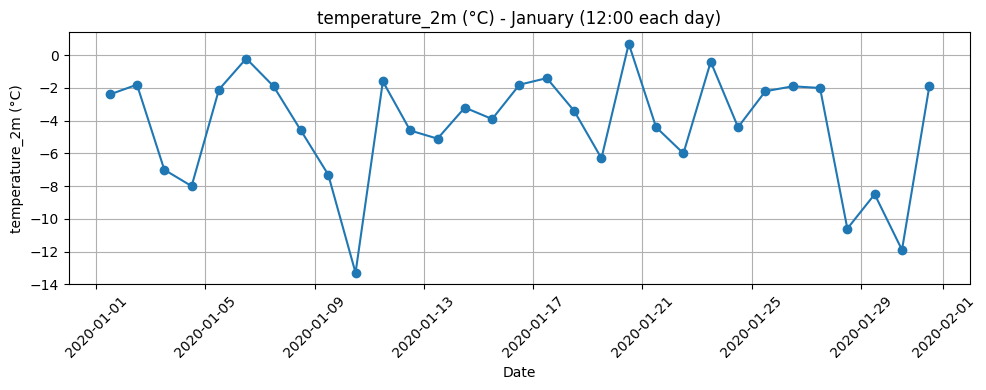

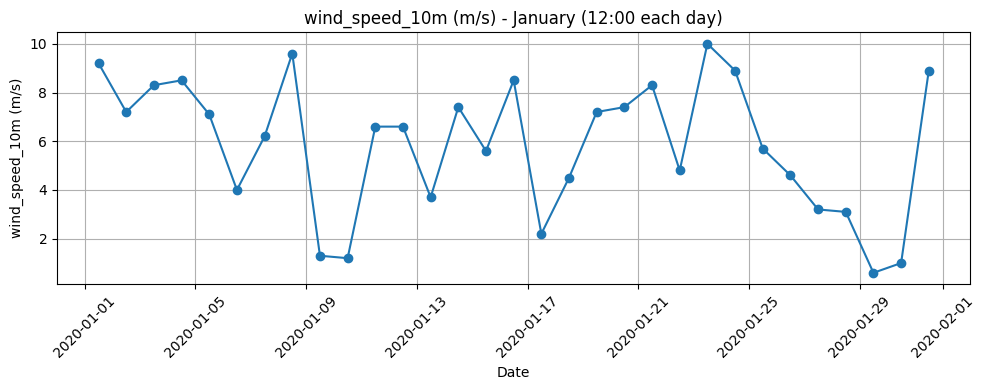

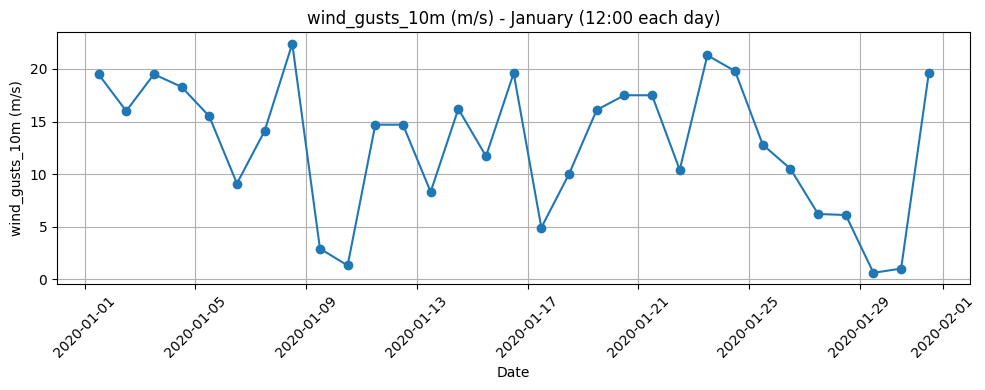

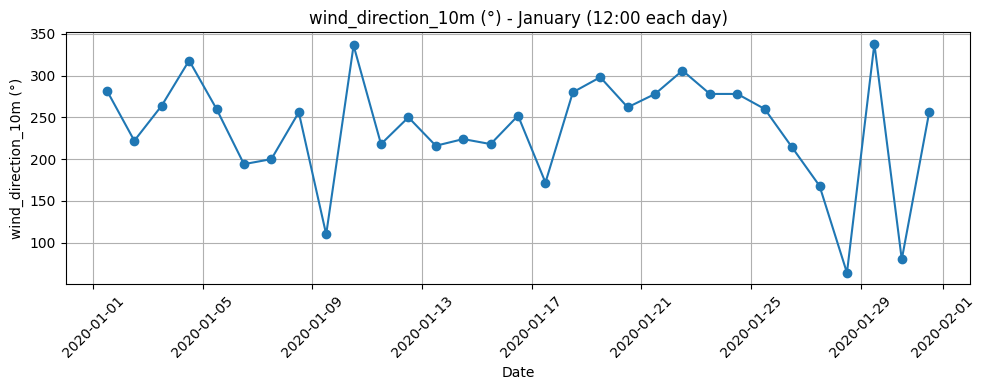

In [4]:
import matplotlib.pyplot as plt
x = df_jan_noon['time']  # x-axis (only one per day now)

for col in data_columns:
    plt.figure(figsize=(10,4))
    plt.plot(x, df_jan_noon[col], marker='o')
    plt.title(f"{col} - January (12:00 each day)")
    plt.xlabel("Date")
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

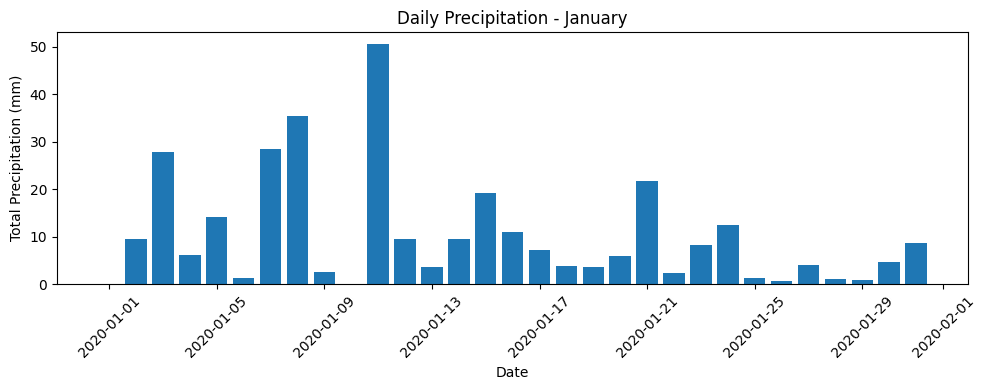

In [5]:
# Plot total daily precipitation for January as a bar chart
plt.figure(figsize=(10,4))
plt.bar(df_jan_precip['date'], df_jan_precip['precipitation (mm)'])
plt.title("Daily Precipitation - January")
plt.xlabel("Date")
plt.ylabel("Total Precipitation (mm)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Plot all columns together
Consider how to make this natural, given that the scales are different.
Deciding that I want a left y-axis with values corresponding to temperature and windspeed and wind gusts. The right y-axis for percipitation. Deciding to show the wind direction as an arrow for the wind direction at noon each day. 

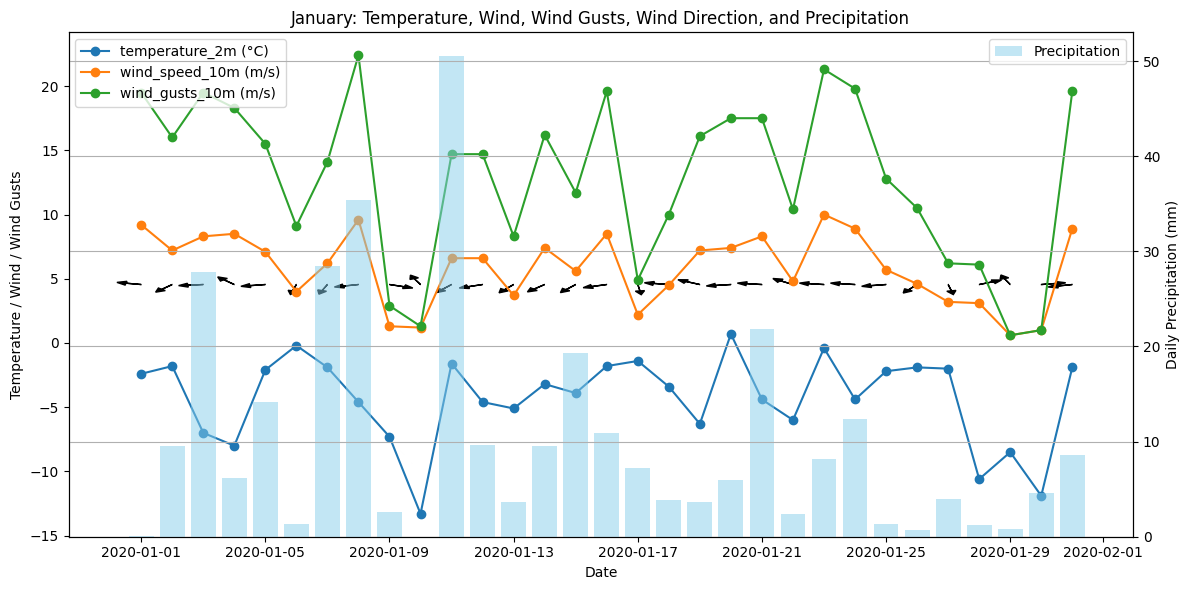

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Left y-axis: temperature, wind, wind gusts
left_columns = ['temperature_2m (°C)', 'wind_speed_10m (m/s)', 'wind_gusts_10m (m/s)']

fig, ax1 = plt.subplots(figsize=(12,6))

# Plot daily value at noon for left-axis variables
for col in left_columns:
    ax1.plot(df_jan_noon['time'].dt.date, df_jan_noon[col], marker='o', label=col)

ax1.set_xlabel("Date")
ax1.set_ylabel("Temperature / Wind / Wind Gusts")
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

# Wind direction arrows (centered vertically)
arrow_length = 0.5
y_center = (ax1.get_ylim()[0] + ax1.get_ylim()[1]) / 2 # Place arrows at the vertical center of the left y-axis

for _, row in df_jan_noon.iterrows():
    direction_deg = row['wind_direction_10m (°)']
    direction_rad = np.deg2rad(direction_deg) # Convert degrees to radians for trigonometric functions
    dx = arrow_length * np.sin(direction_rad) # Calculate x and y components
    dy = arrow_length * np.cos(direction_rad)
    ax1.arrow(row['time'].date(), y_center, dx, dy, head_width=0.3, head_length=0.3, fc='k', ec='k') # Draw arrow


# Right y-axis: precipitation using df_jan_precip
ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
ax2.bar(df_jan_precip['date'], df_jan_precip['precipitation (mm)'],
        color='skyblue', alpha=0.5, label='Precipitation')
ax2.set_ylabel("Daily Precipitation (mm)")
ax2.legend(loc='upper right')

# Final plot formatting
plt.title("January: Temperature, Wind, Wind Gusts, Wind Direction, and Precipitation")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
